# *support vector regression*

### Importing the lib and dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv("Position_Salaries.csv")

### Data preparation

In [6]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


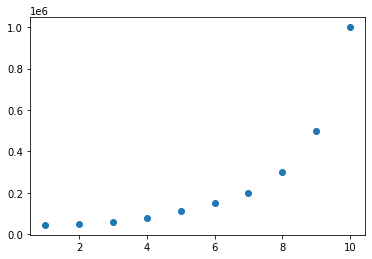

In [7]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
plt.scatter(X,y)

### seperating the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#not usefull for this small exemple

NameError: name 'train_test_split' is not defined

### Feature scaling

In [8]:
#from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### fitting the model to the data

In [9]:
#from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

D:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Predicting with the new value

In [13]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred) 

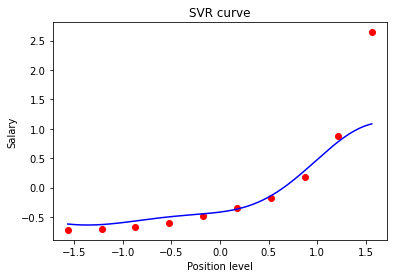

In [11]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR curve')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 

In [19]:
y_pred = sc_y.inverse_transform(regressor.predict([[6.5]])) 
print("our prediction for 6.5 is",y_pred[0])

our prediction for 6.5 is 252789.13921623852


### 